In [19]:
import os
import caesar
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import modules as anal
import modules.anal_func as anal_func

from astropy.cosmology import LambdaCDM
import astropy.units as u
from astropy.io import fits
from scipy import interpolate

from modules.powdermod.makesed import MakeSED

import yt

cosmo = LambdaCDM(H0 = 68, Om0= 0.3, Ode0= 0.7, Ob0=0.048)
plt.rcParams.update({'font.size': 28})

sb = anal.Simba('cis', size='50_full')

In [21]:
#subset = '/home/lorenzong/analize_simba_cgm/output/hdf5/filtered_part_files/snap_129/region_snap129_r100_gal000000.h5'
#subset = '/media/lorenzong/Data1/simba_hig_res/snap_m25n512_129.hdf5' 
tot = sb.get_sim_file(104)
ds = yt.load(tot)

yt : [INFO     ] 2024-10-25 15:06:58,738 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2024-10-25 15:06:58,764 Calculating time from 4.945e-01 to be 1.840e+17 seconds
yt : [INFO     ] 2024-10-25 15:06:58,765 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-10-25 15:06:58,862 Parameters: current_time              = 1.8402007737381914e+17 s
yt : [INFO     ] 2024-10-25 15:06:58,863 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-10-25 15:06:58,864 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-10-25 15:06:58,865 Parameters: domain_right_edge         = [50000. 50000. 50000.]
yt : [INFO     ] 2024-10-25 15:06:58,866 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2024-10-25 15:06:58,867 Parameters: current_redshift          = 1.0221997149755864
yt : [INFO     ] 2024-10-25 15:06:58,867 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-10-25 15:06:58,868 Parame

In [ ]:
p = yt.ProjectionPlot(ds, "y", ("PartType0", "Density"))
#v, c = ds.find_max(("PartType0", "Masses"))
#p.set_center((c[2], c[0]))
#p.zoom(80)
p.set_unit(("PartType0", "Density"), "cm*Msun/kpc**3")
p.show()

In [ ]:
p.save()

yt : [INFO     ] 2024-08-27 11:34:49,517 xlim = 18368.538213 18464.129756
yt : [INFO     ] 2024-08-27 11:34:49,517 ylim = 12164.836064 12260.427607
yt : [INFO     ] 2024-08-27 11:34:49,518 xlim = 18368.538213 18464.129756
yt : [INFO     ] 2024-08-27 11:34:49,518 ylim = 12164.836064 12260.427607
yt : [INFO     ] 2024-08-27 11:34:49,518 Making a fixed resolution buffer of (('PartType0', 'temperature')) 800 by 800



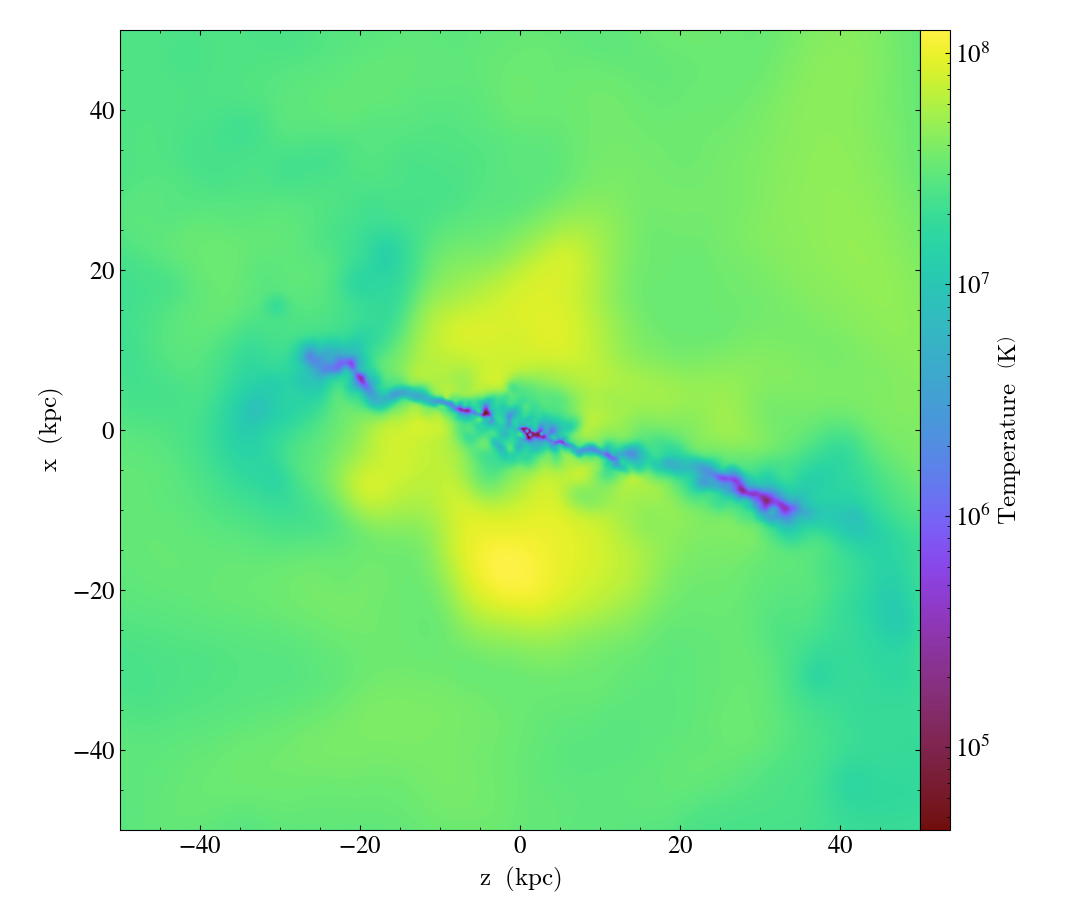

In [17]:
sl = yt.SlicePlot(ds, "y", ("PartType0", "temperature"),\
                  width=(100, "kpc"),\
                 center=((c[0], c[1], c[2])))
sl.set_unit(("PartType0", "temperature"), "K")
sl.show()

yt : [INFO     ] 2024-08-27 11:31:59,433 xlim = 18033.967812 18798.700156
yt : [INFO     ] 2024-08-27 11:31:59,434 ylim = 11830.265664 12594.998008
yt : [INFO     ] 2024-08-27 11:31:59,434 xlim = 18033.967812 18798.700156
yt : [INFO     ] 2024-08-27 11:31:59,434 ylim = 11830.265664 12594.998008
yt : [INFO     ] 2024-08-27 11:31:59,435 Making a fixed resolution buffer of (('PartType0', 'Dust_Masses')) 800 by 800



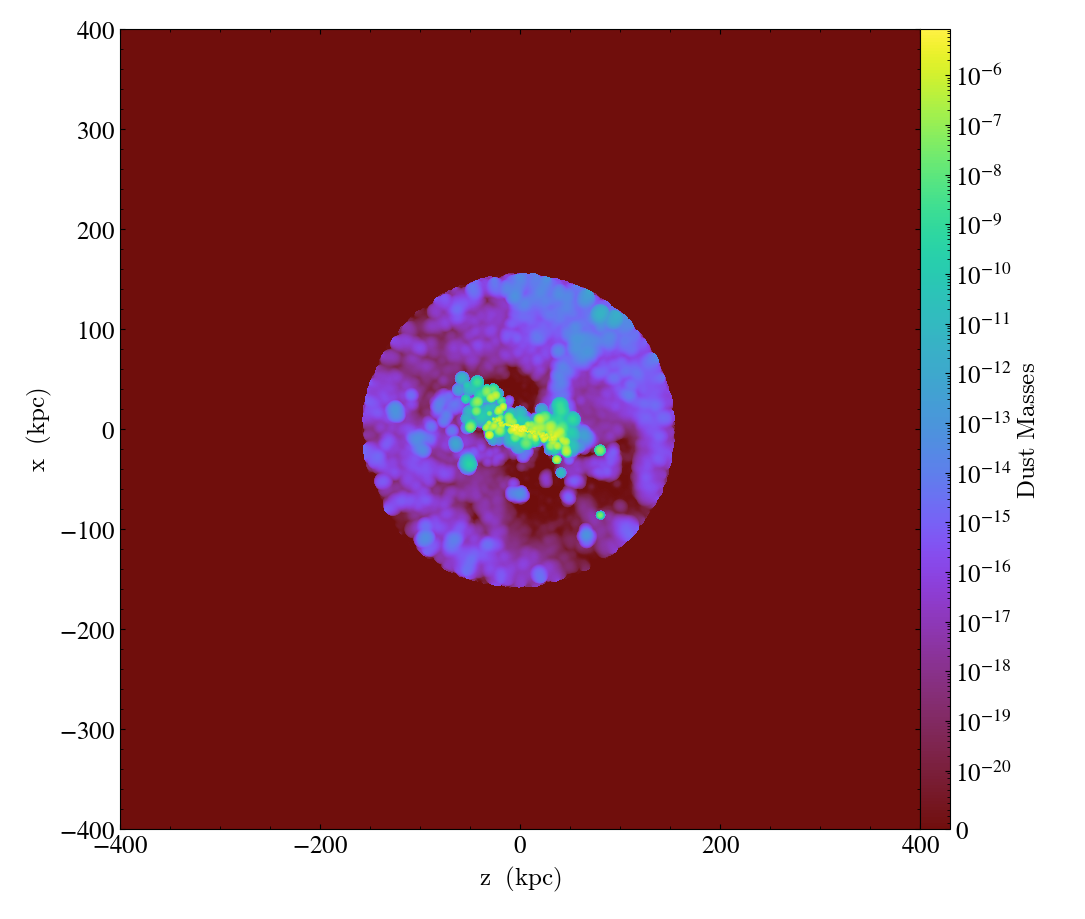

In [5]:
# Create a SlicePlot using the new field
sl = yt.SlicePlot(ds, "y", ("PartType0", "Dust_Masses"),
                  width=(800, "kpc"),
                  center=(c[0], c[1], c[2]))
sl.show()


yt : [INFO     ] 2024-08-27 11:32:07,853 xlim = 18378.097367 18454.570602
yt : [INFO     ] 2024-08-27 11:32:07,853 ylim = 12174.395219 12250.868453
yt : [INFO     ] 2024-08-27 11:32:07,854 xlim = 18378.097367 18454.570602
yt : [INFO     ] 2024-08-27 11:32:07,854 ylim = 12174.395219 12250.868453
yt : [INFO     ] 2024-08-27 11:32:07,855 Making a fixed resolution buffer of (('PartType0', 'velocity_z')) 800 by 800



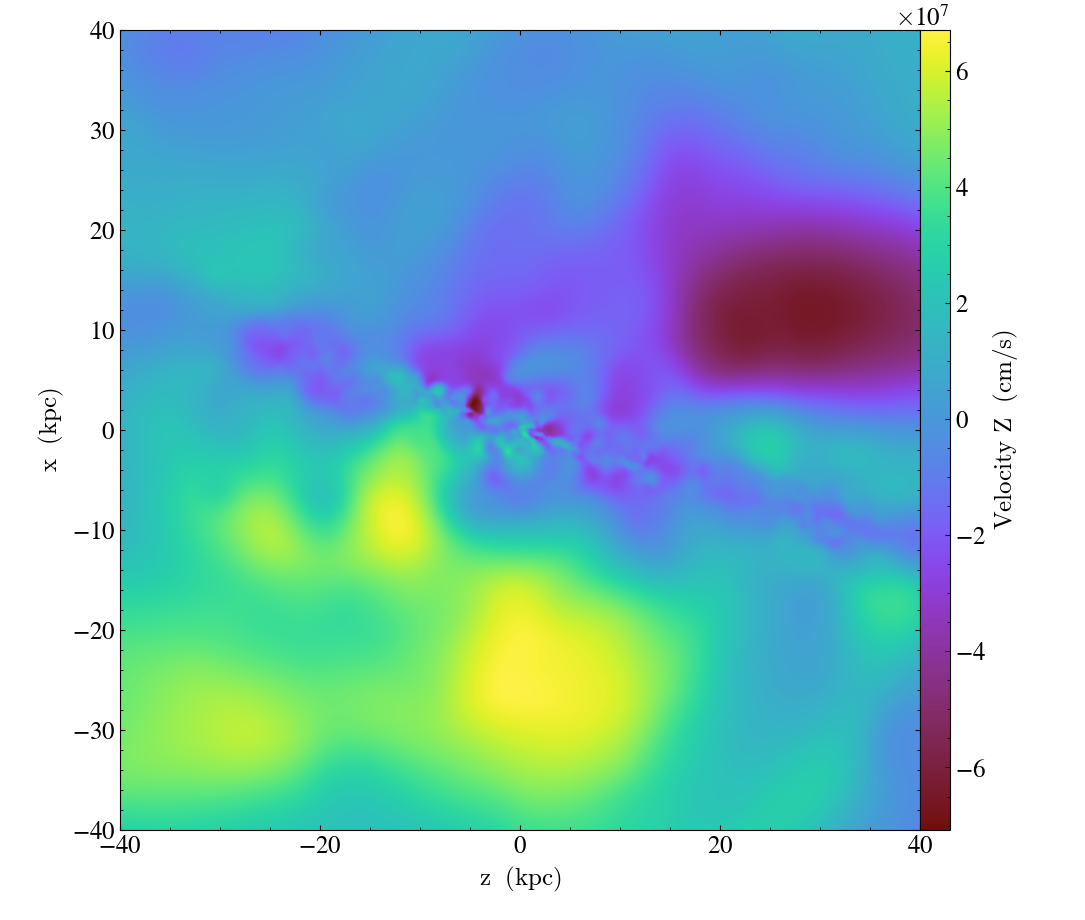

yt : [INFO     ] 2024-08-27 11:32:09,114 xlim = 18378.097367 18454.570602
yt : [INFO     ] 2024-08-27 11:32:09,114 ylim = 12174.395219 12250.868453
yt : [INFO     ] 2024-08-27 11:32:09,115 xlim = 18378.097367 18454.570602
yt : [INFO     ] 2024-08-27 11:32:09,115 ylim = 12174.395219 12250.868453
yt : [INFO     ] 2024-08-27 11:32:09,116 Making a fixed resolution buffer of (('PartType0', 'velocity_x')) 800 by 800



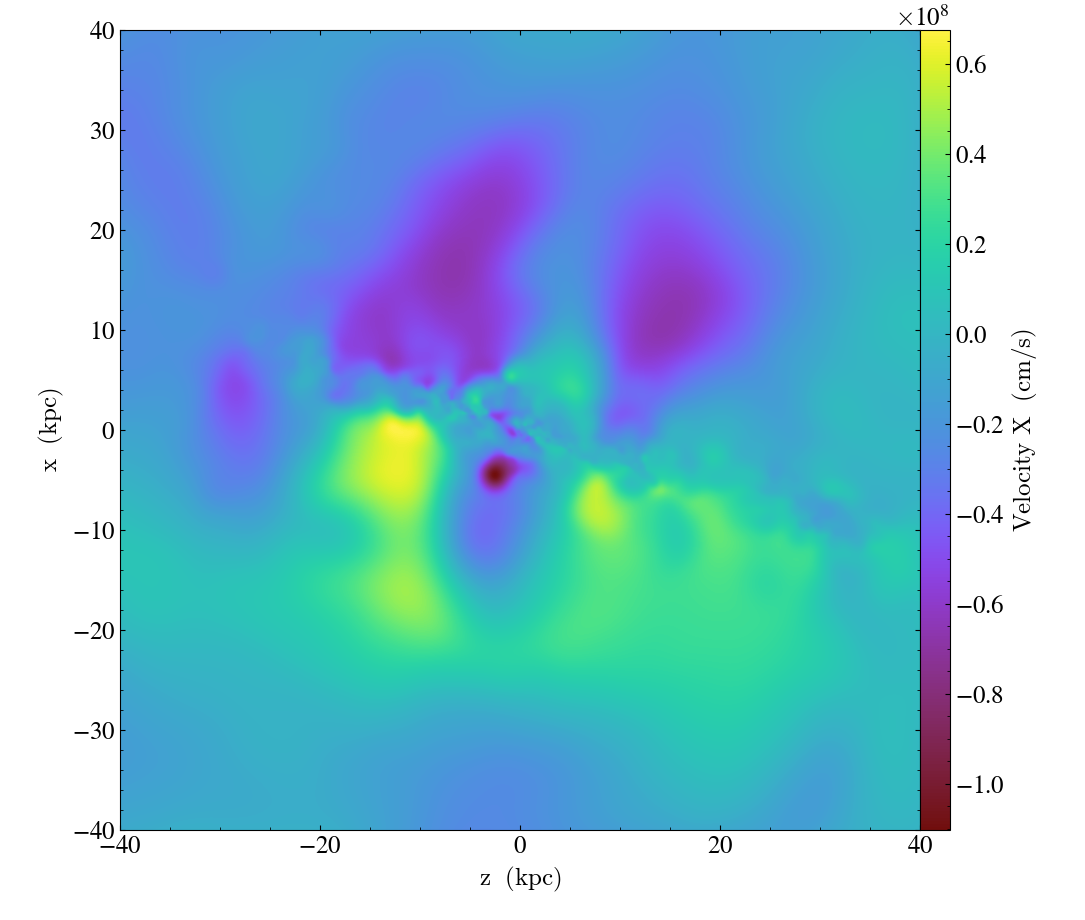

In [6]:
sl = yt.SlicePlot(ds, "y", ("PartType0", "velocity_z"),\
                  width=(80, "kpc"),\
                 center=((c[0], c[1], c[2])))
#sl.set_unit(("PartType0", "Dust_Masses"), "Msun")
sl.show()

sl = yt.SlicePlot(ds, "y", ("PartType0", "velocity_x"),\
                  width=(80, "kpc"),\
                 center=((c[0], c[1], c[2])))
#sl.set_unit(("PartType0", "Dust_Masses"), "Msun")
sl.show()

yt : [INFO     ] 2024-10-25 15:16:54,876 max value is 4.90350e-03 at 7364.3891601562500000 10706.3779296875000000 8176.4619140625000000
yt : [INFO     ] 2024-10-25 15:17:26,997 xlim = 8121.458082 8231.465746
yt : [INFO     ] 2024-10-25 15:17:26,998 ylim = 7309.385328 7419.392992
yt : [INFO     ] 2024-10-25 15:17:27,001 xlim = 8121.458082 8231.465746
yt : [INFO     ] 2024-10-25 15:17:27,003 ylim = 7309.385328 7419.392992
yt : [INFO     ] 2024-10-25 15:17:27,007 Making a fixed resolution buffer of (('PartType0', 'velocity_y')) 800 by 800



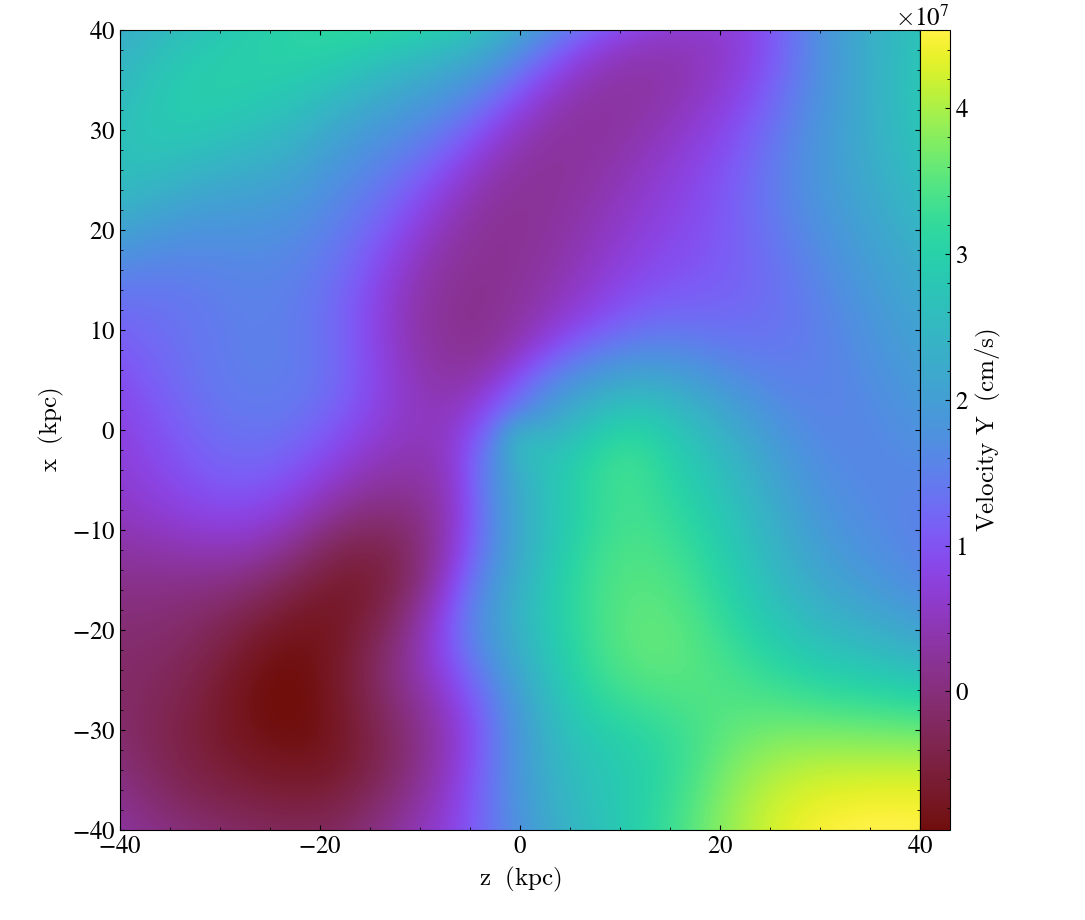

In [24]:
v, c = ds.find_max(("PartType0", "Masses"))
sl = yt.SlicePlot(ds, "y", ("PartType0", "velocity_y"),\
                  width=(80, "kpc"),\
                 center=((c[0], c[1], c[2])))
#sl.set_unit(("PartType0", "Dust_Masses"), "Msun")
sl.show()

yt : [INFO     ] 2024-08-27 11:32:18,871 xlim = 18378.097367 18454.570602
yt : [INFO     ] 2024-08-27 11:32:18,871 ylim = 12174.395219 12250.868453
yt : [INFO     ] 2024-08-27 11:32:18,872 xlim = 18378.097367 18454.570602
yt : [INFO     ] 2024-08-27 11:32:18,872 ylim = 12174.395219 12250.868453
yt : [INFO     ] 2024-08-27 11:32:18,873 Making a fixed resolution buffer of (('PartType0', 'Sigma')) 800 by 800



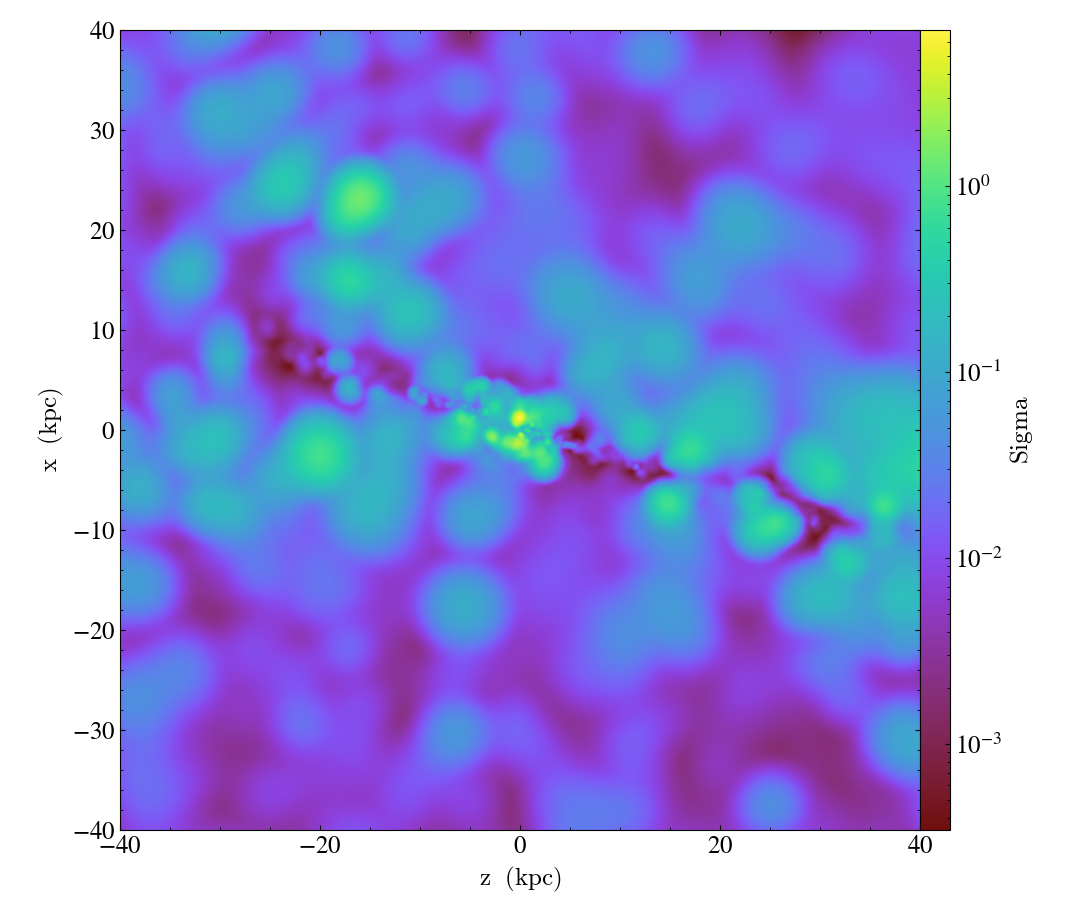

In [7]:
sl = yt.SlicePlot(ds, "y", ("PartType0", "Sigma"),\
                  width=(80, "kpc"),\
                 center=((c[0], c[1], c[2])))
#sl.set_unit(("PartType0", "Dust_Masses"), "Msun")
sl.show()

yt : [INFO     ] 2024-08-27 11:32:23,508 xlim = 18378.097367 18454.570602
yt : [INFO     ] 2024-08-27 11:32:23,508 ylim = 12174.395219 12250.868453
yt : [INFO     ] 2024-08-27 11:32:23,509 xlim = 18378.097367 18454.570602
yt : [INFO     ] 2024-08-27 11:32:23,509 ylim = 12174.395219 12250.868453
yt : [INFO     ] 2024-08-27 11:32:23,510 Making a fixed resolution buffer of (('PartType0', 'NeutralHydrogenAbundance')) 800 by 800



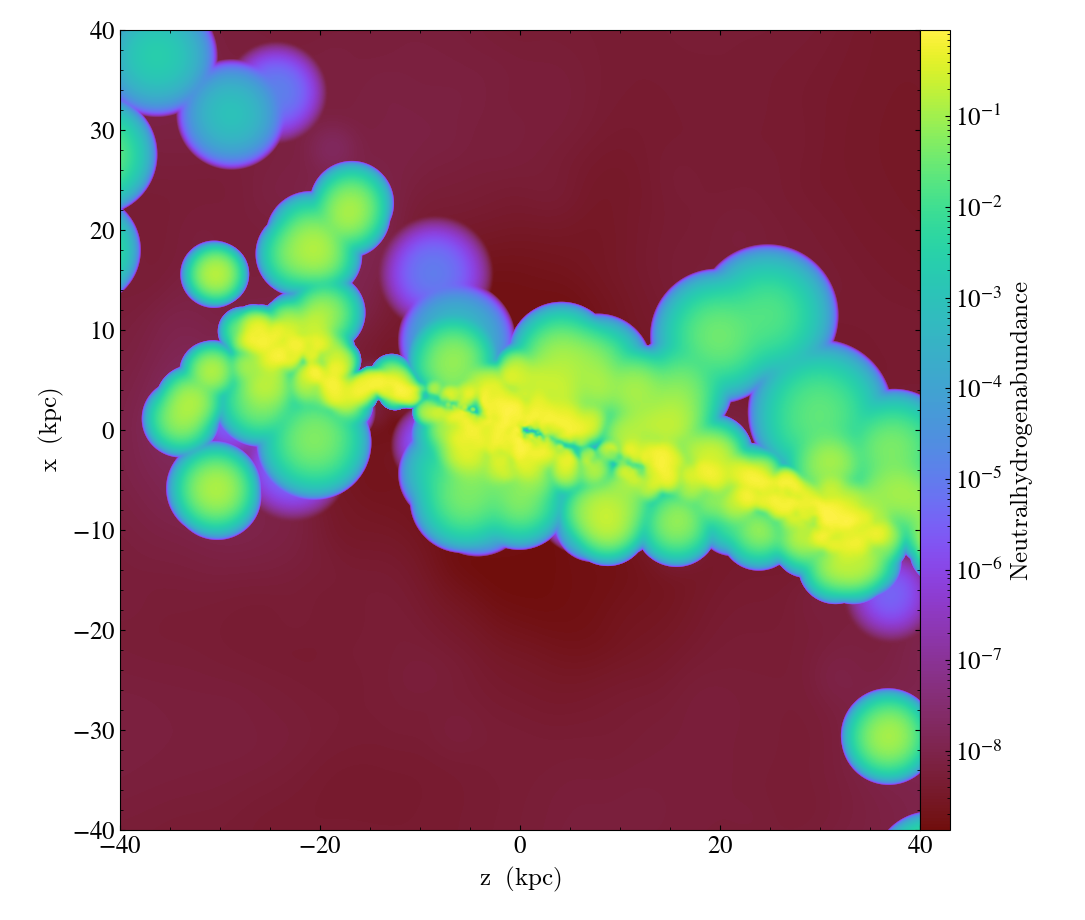

In [8]:
sl = yt.SlicePlot(ds, "y", ("PartType0", "NeutralHydrogenAbundance"),\
                  width=(80, "kpc"),\
                 center=((c[0], c[1], c[2])))
#sl.set_unit(("PartType0", "Dust_Masses"), "Msun")
sl.show()

Interpolating SPH field ('PartType0', 'Masses'): 400000it [00:00, 6728919.91it/s]
yt : [INFO     ] 2024-08-23 18:21:16,296 Saving field data to yt dataset: particles_within_aperture_covering_grid.h5.
yt : [INFO     ] 2024-08-23 18:21:18,944 Parameters: current_time              = 2.968791388457766e+17 s
yt : [INFO     ] 2024-08-23 18:21:18,944 Parameters: domain_dimensions         = [256 256 256] dimensionless
yt : [INFO     ] 2024-08-23 18:21:18,945 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2024-08-23 18:21:18,945 Parameters: domain_right_edge         = [25000. 25000. 25000.] code_length
yt : [INFO     ] 2024-08-23 18:21:18,945 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-08-23 18:21:18,945 Parameters: current_redshift          = 0.4057579856290421
yt : [INFO     ] 2024-08-23 18:21:18,946 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-08-23 18:21:18,946 Parameters: omega_matter              = 0.3
yt : [INFO   

g


yt : [INFO     ] 2024-08-23 18:21:20,432 Projection completed
yt : [INFO     ] 2024-08-23 18:21:20,432 xlim = 0.000000 25000.000000
yt : [INFO     ] 2024-08-23 18:21:20,432 ylim = 0.000000 25000.000000
yt : [INFO     ] 2024-08-23 18:21:20,433 xlim = 0.000000 25000.000000
yt : [INFO     ] 2024-08-23 18:21:20,433 ylim = 0.000000 25000.000000
yt : [INFO     ] 2024-08-23 18:21:20,434 Making a fixed resolution buffer of (('grid', 'nbody_mass')) 800 by 800
yt : [INFO     ] 2024-08-23 18:21:20,601 max value is 4.66547e-04 at 12212.6318359375000000 15212.4453125000000000 18416.3339843750000000
yt : [INFO     ] 2024-08-23 18:21:20,602 xlim = 5916.333984 30916.333984
yt : [INFO     ] 2024-08-23 18:21:20,602 ylim = -287.368164 24712.631836
yt : [INFO     ] 2024-08-23 18:21:20,603 Making a fixed resolution buffer of (('grid', 'nbody_mass')) 800 by 800



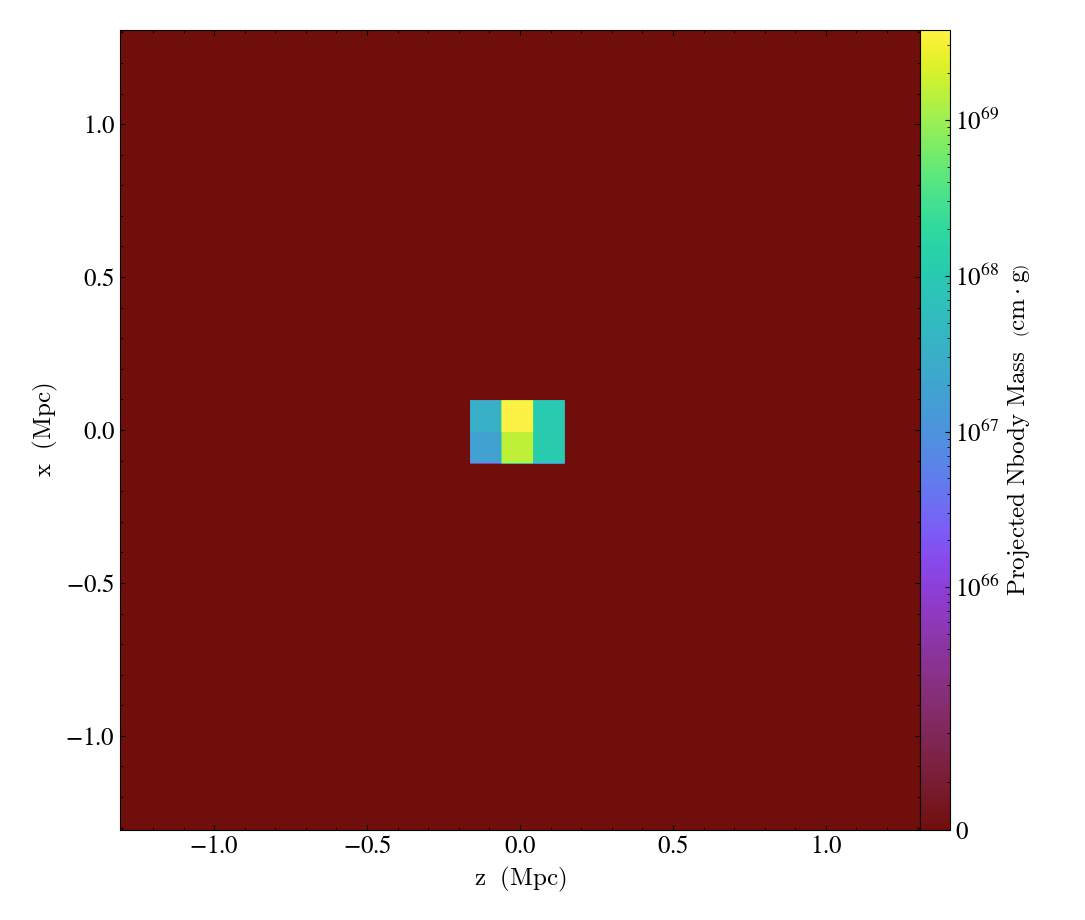

In [6]:
# create a 128^3 covering grid over the entire domain
# Create a 128^3 covering grid over the entire domain

#'/media/lorenzong/Data1/simba_hig_res/snap_m25n512_129.hdf5' 
L = 8
dims = [256, 256, 256]  # Finer grid with higher resolution
# Convert the particle mass to physical units
mass_in_Msun = ds.quan(1.0, "code_mass").in_units("Msun")
cg = ds.covering_grid(level=L, left_edge=ds.domain_left_edge, dims=dims, fields=[('PartType0', 'Masses')])
# Convert the nbody_mass field to physical units (e.g., Msun)
#cg["deposit", "nbody_mass"] = cg["deposit", "nbody_mass"].in_units("Msun")
# Save the covering grid as a new dataset
fn = cg.save_as_dataset(fields=[("deposit", "nbody_mass")])

# Load the newly created grid dataset
ds_grid = yt.load(fn)
print(ds_grid.field_info["grid", "nbody_mass"].units)
# Create a projection plot of the nbody_mass field
p = yt.ProjectionPlot(ds_grid, 'y', ("grid", "nbody_mass"))
v, c = ds.find_max(("PartType0", "Masses"))
p.set_center((c[2], c[0]))
p.zoom(10)
# Show the plot
p.show()

yt : [INFO     ] 2024-08-27 11:48:56,157 xlim = 14925.670683 15499.219942
yt : [INFO     ] 2024-08-27 11:48:56,161 ylim = 18129.559355 18703.108613
yt : [INFO     ] 2024-08-27 11:48:56,162 xlim = 14925.670683 15499.219942
yt : [INFO     ] 2024-08-27 11:48:56,163 ylim = 18129.559355 18703.108613
yt : [INFO     ] 2024-08-27 11:48:56,163 Splatting (('PartType4', 'particle_mass')) onto a 800 by 800 mesh using method 'ngp'



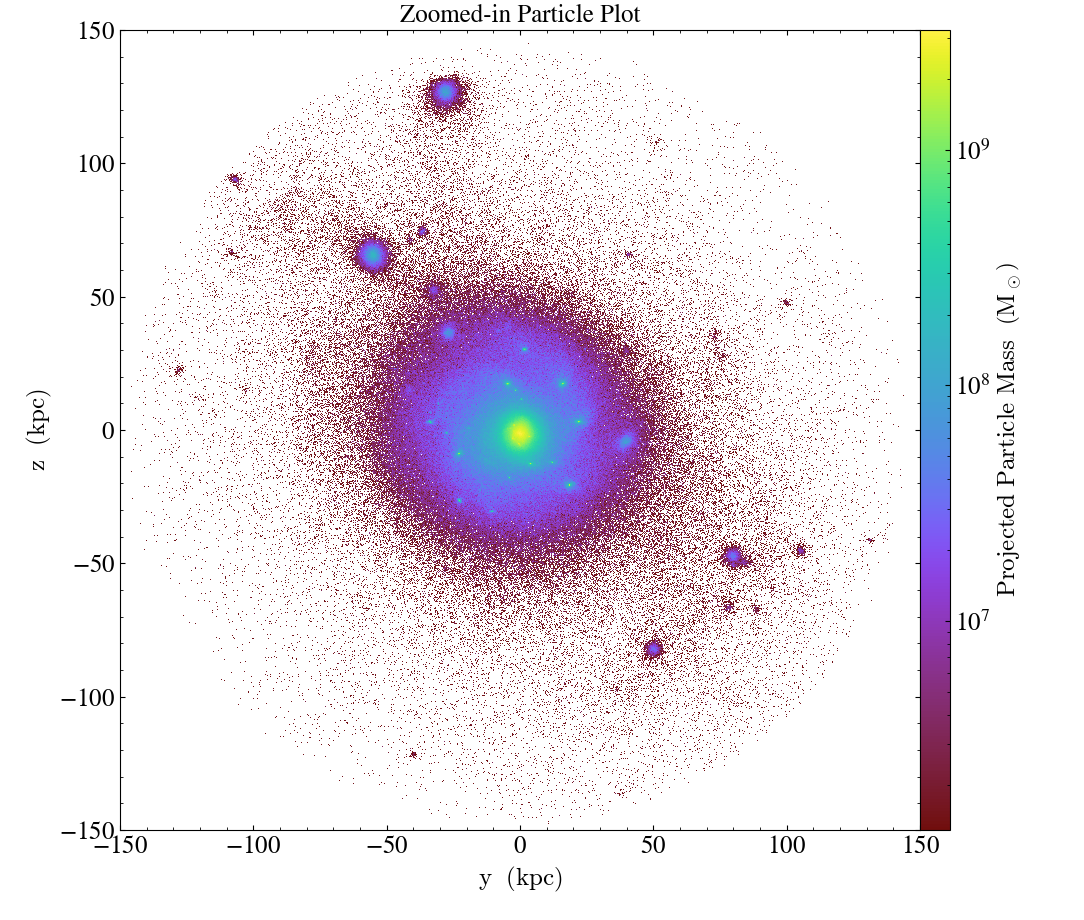

In [21]:
pp = yt.ParticlePlot(
    ds,
    ("PartType4", "particle_position_z"),
    ("PartType4", "particle_position_y"),
    ("PartType4", "particle_mass"),
    center=(c[0], c[1], c[2]),
    width=(600, "kpc"),
)
pp.set_unit(("PartType4", "particle_mass"), "Msun")
pp.annotate_title("Zoomed-in Particle Plot")
pp.zoom(2)
# Display the modified plot
pp.show()

yt : [INFO     ] 2024-08-27 11:50:20,877 xlim = 14925.670683 15499.219942
yt : [INFO     ] 2024-08-27 11:50:20,879 ylim = 18129.559355 18703.108613
yt : [INFO     ] 2024-08-27 11:50:20,881 xlim = 14925.670683 15499.219942
yt : [INFO     ] 2024-08-27 11:50:20,882 ylim = 18129.559355 18703.108613
yt : [INFO     ] 2024-08-27 11:50:20,885 Splatting (('PartType0', 'particle_mass')) onto a 800 by 800 mesh using method 'ngp'



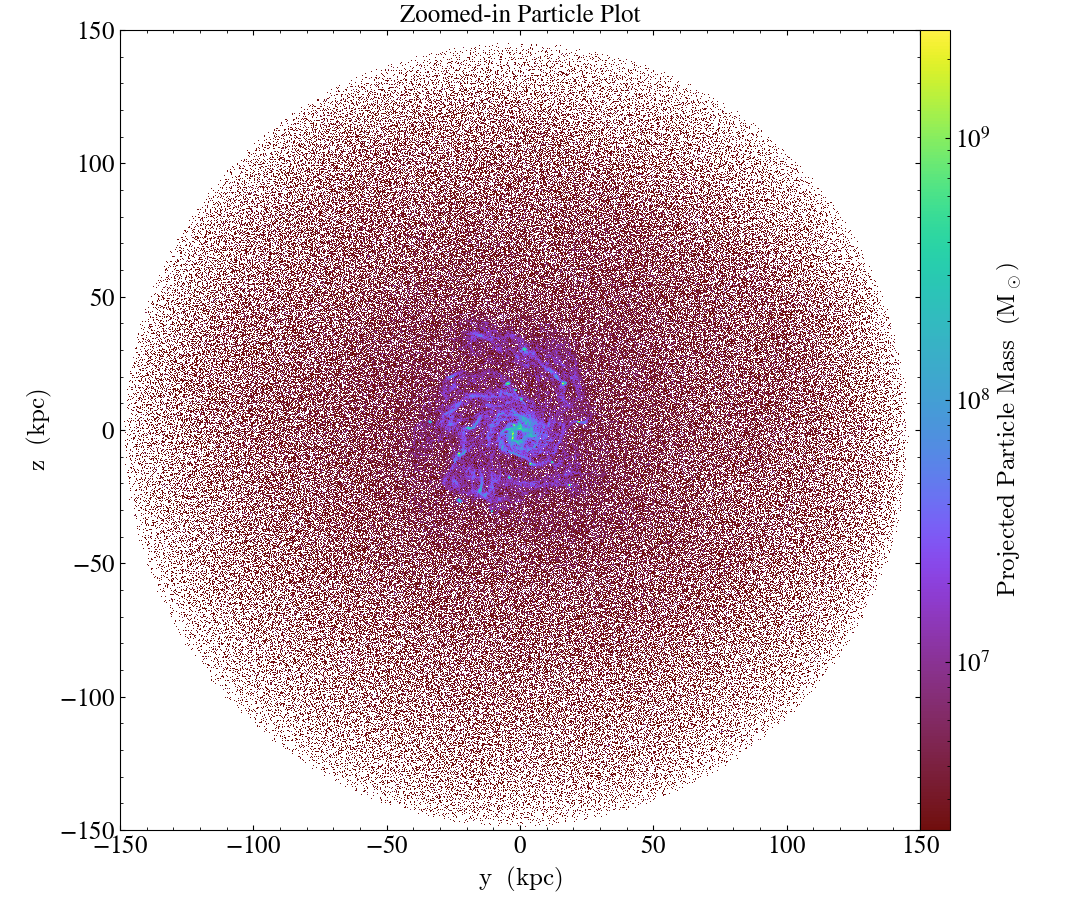

In [24]:
pp = yt.ParticlePlot(
    ds,
    ("PartType0", "particle_position_z"),
    ("PartType0", "particle_position_y"),
    ("PartType0", "particle_mass"),
    center=(c[0], c[1], c[2]),
    width=(600, "kpc"),
)
pp.set_unit(("PartType0", "particle_mass"), "Msun")
pp.annotate_title("Zoomed-in Particle Plot")
pp.zoom(2)
# Display the modified plot
pp.show()

yt : [INFO     ] 2024-08-27 11:32:49,438 xlim = 18320.742441 18511.925527
yt : [INFO     ] 2024-08-27 11:32:49,440 ylim = 12117.040293 12308.223379
yt : [INFO     ] 2024-08-27 11:32:49,442 xlim = 18320.742441 18511.925527
yt : [INFO     ] 2024-08-27 11:32:49,443 ylim = 12117.040293 12308.223379
yt : [INFO     ] 2024-08-27 11:32:49,448 Splatting (('PartType0', 'temperature')) onto a 800 by 800 mesh using method 'ngp'



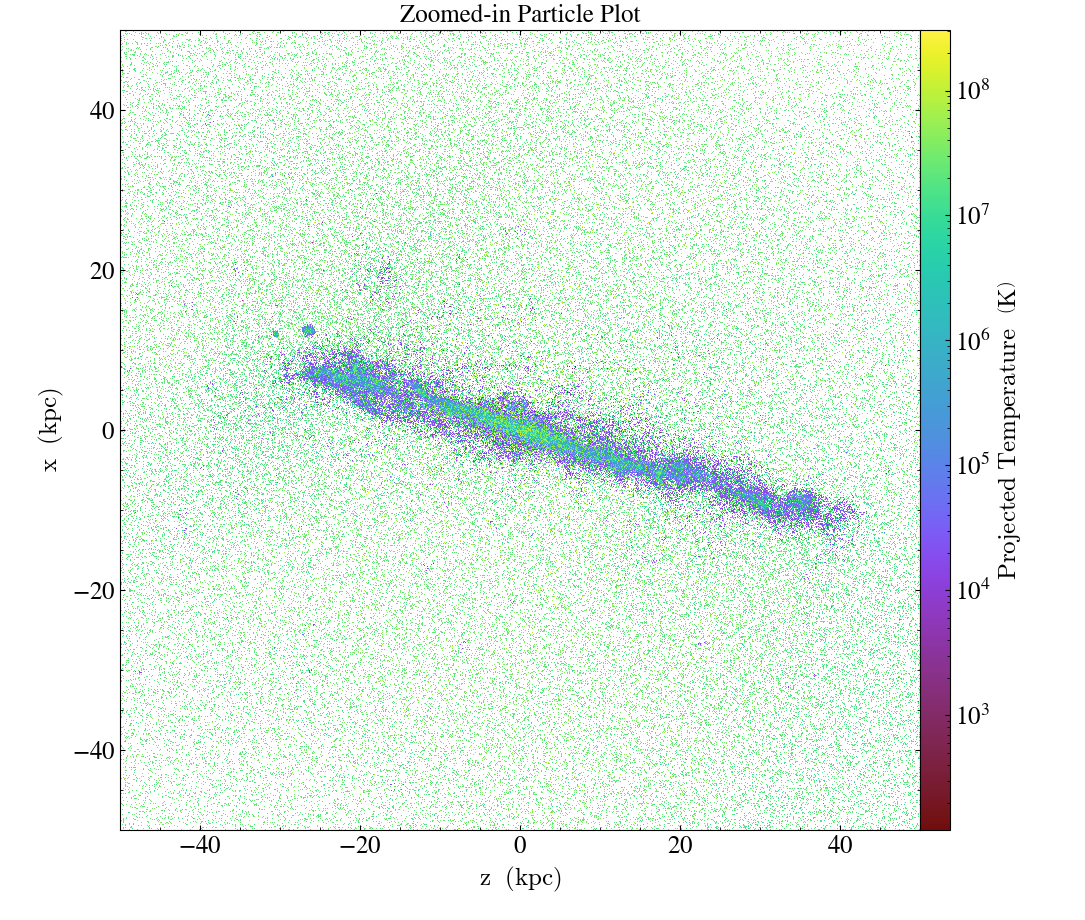

In [11]:
pp = yt.ParticlePlot(
    ds,
    ("PartType0", "particle_position_z"),
    ("PartType0", "particle_position_x"),
    ("PartType0", "temperature"),
    center=(c[0], c[1], c[2]),
    width=(200, "kpc"),
)
pp.set_unit(("PartType0", "temperature"), "K")
pp.annotate_title("Zoomed-in Particle Plot")
pp.zoom(2)
# Display the modified plot
pp.show()

yt : [INFO     ] 2024-08-27 11:32:57,720 xlim = 18320.742441 18511.925527
yt : [INFO     ] 2024-08-27 11:32:57,721 ylim = 12117.040293 12308.223379
yt : [INFO     ] 2024-08-27 11:32:57,723 xlim = 18320.742441 18511.925527
yt : [INFO     ] 2024-08-27 11:32:57,724 ylim = 12117.040293 12308.223379
yt : [INFO     ] 2024-08-27 11:32:57,727 Splatting (('PartType0', 'Dust_Masses')) onto a 800 by 800 mesh using method 'ngp'



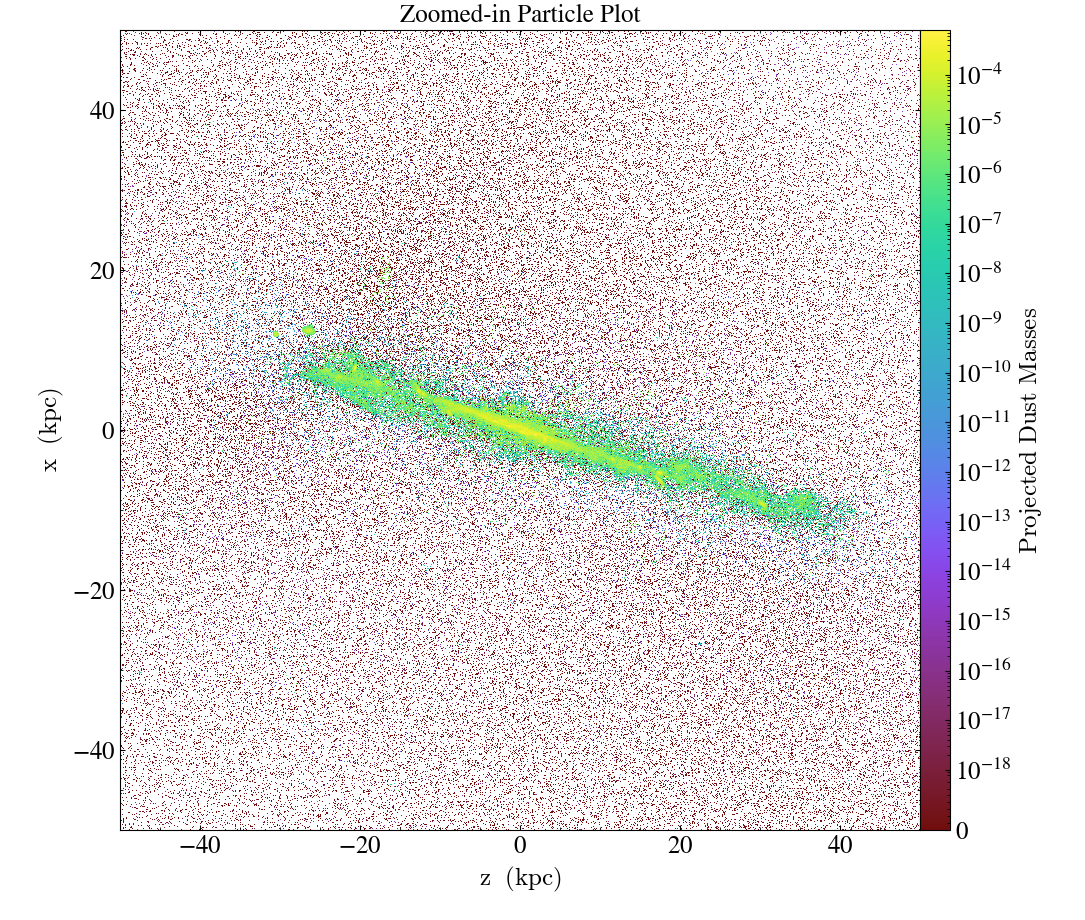

In [12]:
pp = yt.ParticlePlot(
    ds,
    ("PartType0", "particle_position_z"),
    ("PartType0", "particle_position_x"),
    ("PartType0", "Dust_Masses"),
    center=(c[0], c[1], c[2]),
    width=(200, "kpc"),
)
#pp.set_unit(("PartType0", "temperature"), "K")
pp.annotate_title("Zoomed-in Particle Plot")
pp.zoom(2)
# Display the modified plot
pp.show()

In [70]:
print(ds.field_list)

[('PartType0', 'AGS-Softening'), ('PartType0', 'Coordinates'), ('PartType0', 'DelayTime'), ('PartType0', 'Density'), ('PartType0', 'Dust_Masses'), ('PartType0', 'Dust_Metallicity'), ('PartType0', 'ElectronAbundance'), ('PartType0', 'FractionH2'), ('PartType0', 'GrackleHI'), ('PartType0', 'GrackleHII'), ('PartType0', 'GrackleHM'), ('PartType0', 'GrackleHeI'), ('PartType0', 'GrackleHeII'), ('PartType0', 'GrackleHeIII'), ('PartType0', 'HaloID'), ('PartType0', 'ID_Generations'), ('PartType0', 'InternalEnergy'), ('PartType0', 'Masses'), ('PartType0', 'Metallicity_00'), ('PartType0', 'Metallicity_01'), ('PartType0', 'Metallicity_02'), ('PartType0', 'Metallicity_03'), ('PartType0', 'Metallicity_04'), ('PartType0', 'Metallicity_05'), ('PartType0', 'Metallicity_06'), ('PartType0', 'Metallicity_07'), ('PartType0', 'Metallicity_08'), ('PartType0', 'Metallicity_09'), ('PartType0', 'Metallicity_10'), ('PartType0', 'NWindLaunches'), ('PartType0', 'NeutralHydrogenAbundance'), ('PartType0', 'ParticleI